In [34]:
! pip install -q pandas numpy matplotlib seaborn plotly wordcloud nltk textblob


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Text processing
import re
import string
from collections import Counter
from wordcloud import WordCloud
import nltk

In [2]:

# Download NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('vader_lexicon', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

In [4]:
print(" All libraries imported successfully!")
print(f" Pandas version: {pd.__version__}")
print(f" NumPy version: {np.__version__}")
print(f" Matplotlib version: {plt. matplotlib.__version__}")

 All libraries imported successfully!
 Pandas version: 2.2.3
 NumPy version: 2.2.4
 Matplotlib version: 3.10.1


In [6]:
import os

In [7]:
file_path = '/home/len/Downloads/iaIot/m3/sentiment_analysis_nlp/data/raw/tweeterData.csv'
encodings_to_try = ['ISO-8859-1','utf-8', 'utf-8-sig', 'latin1', 'cp1252']
data = None

if os.path.exists(file_path):
    for enc in encodings_to_try:
        try:
            data = pd.read_csv(file_path, encoding=enc, on_bad_lines='skip')
            print(f'Read CSV with encoding: {enc}')
            break
        except UnicodeDecodeError:
            continue
    if data is None:
        data = pd.read_csv(file_path, encoding='latin1', encoding_errors='replace', on_bad_lines='skip')
        print('Read CSV with latin1 and replaced undecodable characters')
else:
    print(f'File not found: {file_path}')

Read CSV with encoding: ISO-8859-1


In [8]:
columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
data.columns = columns
data.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School to...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [67]:
print(f"   Shape: {data.shape}")
print(f"   Columns:  {data.columns.tolist()}")

   Shape: (1599999, 6)
   Columns:  ['target', 'ids', 'date', 'flag', 'user', 'text']


In [70]:
print(f"\n📊 Last 5 rows:")
display(data.tail())


📊 Last 5 rows:


,target,ids,date,flag,user,text
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur
1599998,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H


In [71]:
print(f"\n📋 Random sample (5 rows):")
display(data.sample(5))


📋 Random sample (5 rows):


,target,ids,date,flag,user,text
585499,0,2215646716,Wed Jun 17 18:25:20 PDT 2009,NO_QUERY,attitudecandy,"@AnneMarieFOD -oh right sorry I didnt think about that, i was just excited for you and them, so..."
1048057,4,1958106010,Fri May 29 02:40:52 PDT 2009,NO_QUERY,malfoymanor,"@TomFelton Awww~, that's so sweet of your mom!"
954933,4,1824936699,Sun May 17 03:36:15 PDT 2009,NO_QUERY,unfolder,@kristianramirez http://twitpic.com/5cr5x - The cutest couple
196457,0,1970721939,Sat May 30 04:58:51 PDT 2009,NO_QUERY,MichaelVDK,I'm so annoyed I have to work on the hottest day ever!!
1545011,4,2181924562,Mon Jun 15 12:29:05 PDT 2009,NO_QUERY,Maayanc,@mileycyrus you deserve that


In [72]:
# 1. Dataset shape
print(f"\n DATASET SHAPE")
print(f"   Total rows: {data.shape[0]: ,}")
print(f"   Total columns: {data.shape[1]}")
print(f"   Total cells: {data.shape[0] * data.shape[1]: ,}")


 DATASET SHAPE
   Total rows:  1,599,999
   Total columns: 6
   Total cells:  9,599,994


In [51]:
# 2. Memory usage
print(f"\n MEMORY USAGE")
memory_mb = data.memory_usage(deep=True).sum() / 1024**2
print(f"   Total memory: {memory_mb:.2f} MB")
print(f"   Per row:  {memory_mb / len(data) * 1000:.2f} KB")


 MEMORY USAGE
   Total memory: 507.20 MB
   Per row:  0.32 KB


In [73]:

# 3. Data types
print(f"\n DATA TYPES")
data.dtypes



 DATA TYPES


target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [74]:

# 4. Column names and types
print(f"\n COLUMN DETAILS")
for col in data.columns:
    dtype = data[col].dtype
    non_null = data[col].count()
    null_count = data[col].isnull().sum()
    unique = data[col].nunique()
    print(f"   {col:15} | Type: {str(dtype):10} | Non-Null: {non_null:,} | Null: {null_count:,} | Unique: {unique:,}")



 COLUMN DETAILS
   target          | Type: int64      | Non-Null: 1,599,999 | Null: 0 | Unique: 2
   ids             | Type: int64      | Non-Null: 1,599,999 | Null: 0 | Unique: 1,598,314
   date            | Type: object     | Non-Null: 1,599,999 | Null: 0 | Unique: 774,362
   flag            | Type: object     | Non-Null: 1,599,999 | Null: 0 | Unique: 1
   user            | Type: object     | Non-Null: 1,599,999 | Null: 0 | Unique: 659,775
   text            | Type: object     | Non-Null: 1,599,999 | Null: 0 | Unique: 1,581,465


In [75]:
print(f"\n DETAILED INFO")
data.info()



 DETAILED INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [76]:
# 6. Describe all columns
print(f"\n STATISTICAL SUMMARY")
display(data.describe(include='all'))


 STATISTICAL SUMMARY


,target,ids,date,flag,user,text
count,1.599999e+06,1.599999e+06,1599999,1599999,1599999,1599999
unique,NaN,NaN,774362,1,659775,1581465
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1599999,549,210
mean,2.000001e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935757e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467811e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,4.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


In [77]:
# 1. Understand target values
print(f"\n TARGET VALUE DISTRIBUTION")
print(f"   Original target values:")
print(data['target'].value_counts().sort_index())


 TARGET VALUE DISTRIBUTION
   Original target values:
target
0    799999
4    800000
Name: count, dtype: int64


In [78]:
# Explanation
print(f"\n   Target encoding:")
print(f"   0 = Negative sentiment")
print(f"   2 = Neutral sentiment (if exists)")
print(f"   4 = Positive sentiment")


   Target encoding:
   0 = Negative sentiment
   2 = Neutral sentiment (if exists)
   4 = Positive sentiment


In [9]:
def convert_target(target):
    """Convert numeric target to sentiment label"""
    if target == 0:
        return 'Negative'
    elif target == 2:
        return 'Neutral'
    elif target == 4:
        return 'Positive'
    else:
        return 'Unknown'

In [10]:
data['sentiment'] = data['target'].apply(convert_target)

print(f" Sentiment labels created!")
print(f"\n Sentiment Distribution:")
print(data['sentiment'].value_counts())

 Sentiment labels created!

 Sentiment Distribution:
sentiment
Positive    800000
Negative    799999
Name: count, dtype: int64


In [11]:
# 3. Parse date
print(f"\n Parsing dates...")
data['date_parsed'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date_parsed']. dt.year
data['month'] = data['date_parsed'].dt.month
data['day'] = data['date_parsed'].dt. day
data['hour'] = data['date_parsed'].dt.hour
data['day_of_week'] = data['date_parsed'].dt.day_name()


 Parsing dates...


In [88]:
# 4. Analyze flag field
print(f"\n🚩 FLAG FIELD ANALYSIS")
print(f"   Unique flags:")
print(data['flag'].value_counts().head(10))


🚩 FLAG FIELD ANALYSIS
   Unique flags:
flag
NO_QUERY    1599999
Name: count, dtype: int64


In [12]:
# 5. User analysis
print(f"\n USER ANALYSIS")
print(f"   Total unique users: {data['user'].nunique():,}")
print(f"   Top 10 most active users:")
top_users = data['user'].value_counts().head(10)
for user, count in top_users.items():
    print(f"      @{user}: {count:,} tweets")


 USER ANALYSIS
   Total unique users: 659,775
   Top 10 most active users:
      @lost_dog: 549 tweets
      @webwoke: 345 tweets
      @tweetpet: 310 tweets
      @SallytheShizzle: 281 tweets
      @VioletsCRUK: 279 tweets
      @mcraddictal: 276 tweets
      @tsarnick: 248 tweets
      @what_bugs_u: 246 tweets
      @Karen230683: 238 tweets
      @DarkPiano: 236 tweets


In [90]:
# 6. Check for duplicates
print(f"\n DUPLICATE CHECK")
duplicate_ids = data['ids'].duplicated().sum()
duplicate_text = data['text'].duplicated().sum()
print(f"   Duplicate IDs: {duplicate_ids:,}")
print(f"   Duplicate texts: {duplicate_text:,}")


 DUPLICATE CHECK
   Duplicate IDs: 1,685
   Duplicate texts: 18,534


In [91]:
print(f"\n Enhanced Dataset Preview:")
display(data[['sentiment', 'user', 'text', 'date_parsed']].head())



 Enhanced Dataset Preview:


,sentiment,user,text,date_parsed
0,Negative,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School to...,2009-04-06 22:19:49
1,Negative,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,2009-04-06 22:19:53
2,Negative,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57
3,Negative,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you a...",2009-04-06 22:19:57
4,Negative,joy_wolf,@Kwesidei not the whole crew,2009-04-06 22:20:00


In [92]:
#save new datasetenhanced_file_path = '/home/len/Downloads/iaIot/m3/sentiment
enhanced_file_path = '/home/len/Downloads/iaIot/m3/sentiment_analysis_nlp/data/raw/tweeterData_enhanced.csv'
data.to_csv(enhanced_file_path, index=False)
print(f"\n Enhanced dataset saved to: {enhanced_file_path}")


 Enhanced dataset saved to: /home/len/Downloads/iaIot/m3/sentiment_analysis_nlp/data/raw/tweeterData_enhanced.csv


In [94]:

# 1. Dataset overview
print(f"\n DATASET OVERVIEW")
print(f"   Total tweets: {len(data):,}")
print(f"   Total users: {data['user'].nunique():,}")
print(f"   Date range: {data['date_parsed'].min().strftime('%Y-%m-%d')} to {data['date_parsed'].max().strftime('%Y-%m-%d')}")
print(f"   Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


 DATASET OVERVIEW
   Total tweets: 1,599,999
   Total users: 659,775
   Date range: 2009-04-06 to 2009-06-25
   Memory usage: 717.44 MB


In [13]:
# 2. Sentiment distribution
print(f"\n😊 SENTIMENT DISTRIBUTION")
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)


😊 SENTIMENT DISTRIBUTION
sentiment
Positive    800000
Negative    799999
Name: count, dtype: int64


In [101]:

print(f"\n   Percentages:")
sentiment_pct = (sentiment_counts / len(data) * 100).round(2)
for sentiment, pct in sentiment_pct.items():
    bar = '▓' * int(pct/2)
    print(f"   {sentiment:12} :  {pct:6.2f}%  {bar}")


   Percentages:
   Positive     :   50.00%  ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
   Negative     :   50.00%  ▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓


In [14]:

# 3. Class balance
print(f"\n⚖️ CLASS BALANCE")
max_class = sentiment_counts.max()
min_class = sentiment_counts.min()
balance_ratio = min_class / max_class if max_class > 0 else 0
print(f"   Largest class: {max_class:,} ({sentiment_counts. idxmax()})")
print(f"   Smallest class: {min_class: ,} ({sentiment_counts.idxmin()})")
print(f"   Balance ratio: {balance_ratio:.3f}")
if balance_ratio < 0.5:
    print(f"   ⚠️ WARNING: Dataset is imbalanced!")
elif balance_ratio < 0.8:
    print(f"   ⚠️ Moderately balanced")
else:
    print(f"   ✅ Well balanced dataset")



⚖️ CLASS BALANCE
   Largest class: 800,000 (Positive)
   Smallest class:  799,999 (Negative)
   Balance ratio: 1.000
   ✅ Well balanced dataset


In [15]:
# 4. Text length analysis
print(f"\n TEXT LENGTH ANALYSIS")
data['char_count'] = data['text'].str.len()
print(f"\n   Character Count Statistics:")
char_stats = data['char_count'].describe()
print(f"   Mean:    {char_stats['mean']:.1f}")
print(f"   Median: {char_stats['50%']:.1f}")
print(f"   Min:    {char_stats['min']:.0f}")
print(f"   Max:    {char_stats['max']:.0f}")
print(f"   Std:    {char_stats['std']:.1f}")


 TEXT LENGTH ANALYSIS

   Character Count Statistics:
   Mean:    74.1
   Median: 69.0
   Min:    6
   Max:    374
   Std:    36.4


In [16]:
data['word_count'] = data['text'].str.split().str.len()
print(f"\n   Word Count Statistics:")
word_stats = data['word_count'].describe()
print(f"   Mean:   {word_stats['mean']:.1f}")
print(f"   Median: {word_stats['50%']:.1f}")
print(f"   Min:    {word_stats['min']:.0f}")
print(f"   Max:    {word_stats['max']:.0f}")


   Word Count Statistics:
   Mean:   13.2
   Median: 12.0
   Min:    1
   Max:    64


In [20]:
# 5. Text length by sentiment
print(f"\n AVERAGE TEXT LENGTH BY SENTIMENT")
length_by_sentiment = data.groupby('sentiment').agg({
    'char_count': 'mean',
    'word_count': 'mean'
}).round(1)

for sentiment in data['sentiment'].unique():
    if sentiment in length_by_sentiment.index:
        chars = length_by_sentiment.loc[sentiment, 'char_count']
        words = length_by_sentiment.loc[sentiment, 'word_count']
        print(f"   {sentiment:12} : {chars:6.1f} chars, {words:5.1f} words")


 AVERAGE TEXT LENGTH BY SENTIMENT
   Negative     :   74.3 chars,  13.6 words
   Positive     :   73.9 chars,  12.8 words


In [119]:
# 6. Temporal analysis
print(f"\n TEMPORAL ANALYSIS")
if data['date_parsed'].notna().any():
    print(f"   Tweets by year:")
    yearly = data['year'].value_counts().sort_index()
    for year, count in yearly.items():
        print(f"      {year}: {count:,} tweets")
    
    print(f"\n   Tweets by day of week:")
    daily = data['day_of_week'].value_counts()
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    for day in days_order:
        if day in daily.index:
            print(f"      {day:10} : {daily[day]:,} tweets")


 TEMPORAL ANALYSIS
   Tweets by year:
      2009: 1,599,999 tweets

   Tweets by day of week:
      Monday     : 310,204 tweets
      Tuesday    : 185,850 tweets
      Wednesday  : 96,806 tweets
      Thursday   : 106,035 tweets
      Friday     : 225,594 tweets
      Saturday   : 330,955 tweets
      Sunday     : 344,555 tweets


In [120]:
# 7. User activity
print(f"\n USER ACTIVITY")
tweets_per_user = data.groupby('user').size()
print(f"   Average tweets per user: {tweets_per_user.mean():.1f}")
print(f"   Median tweets per user:   {tweets_per_user. median():.0f}")
print(f"   Max tweets by one user:  {tweets_per_user.max():,}")
print(f"   Users with 1 tweet only: {(tweets_per_user == 1).sum():,} ({(tweets_per_user == 1).sum()/len(tweets_per_user)*100:.1f}%)")




 USER ACTIVITY
   Average tweets per user: 2.4
   Median tweets per user:   1
   Max tweets by one user:  549
   Users with 1 tweet only: 405,278 (61.4%)


In [21]:
# 8. Missing values
print(f"\n MISSING VALUES")
missing = data.isnull().sum()
missing_pct = (missing / len(data) * 100).round(2)

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Percentage': missing_pct. values
})
display(missing_df)

if missing. sum() == 0:
    print("   ✅ No missing values found!")
else:
    print(f"   ⚠️ Total missing values: {missing.sum():,}")


 MISSING VALUES


,Column,Missing Count,Percentage
0,target,0,0.0
1,ids,0,0.0
2,date,0,0.0
3,flag,0,0.0
4,user,0,0.0
5,text,0,0.0
6,sentiment,0,0.0
7,date_parsed,0,0.0
8,year,0,0.0
9,month,0,0.0


   ✅ No missing values found!


In [22]:
#Empty or invalid text
print(f"\n TEXT QUALITY")
empty_text = data['text'].str.strip().eq('').sum()
very_short = (data['char_count'] < 5).sum()
very_long = (data['char_count'] > 280).sum()

print(f"   Empty texts:   {empty_text:,} ({empty_text/len(data)*100:.2f}%)")
print(f"   Very short (< 5 chars): {very_short:,} ({very_short/len(data)*100:.2f}%)")
print(f"   Very long (> 280 chars): {very_long:,} ({very_long/len(data)*100:.2f}%)")

if very_short > 0:
    print(f"\n   Sample very short tweets:")
    display(data[data['char_count'] < 5][['text', 'char_count']].head())


 TEXT QUALITY
   Empty texts:   0 (0.00%)
   Very short (< 5 chars): 0 (0.00%)
   Very long (> 280 chars): 18 (0.00%)


In [23]:
#  Duplicate analysis
print(f"\n🔄 DUPLICATE ANALYSIS")
duplicate_ids = data.duplicated(subset='ids').sum()
duplicate_text = data.duplicated(subset='text').sum()
duplicate_full = data.duplicated().sum()

print(f"   Duplicate IDs: {duplicate_ids:,} ({duplicate_ids/len(data)*100:.2f}%)")
print(f"   Duplicate texts: {duplicate_text:,} ({duplicate_text/len(data)*100:.2f}%)")
print(f"   Fully duplicate rows: {duplicate_full:,} ({duplicate_full/len(data)*100:.2f}%)")

if duplicate_text > 0:
    print(f"\n   Sample duplicate tweets:")
    dup_texts = data[data.duplicated(subset='text', keep=False)].sort_values('text')
    display(dup_texts[['sentiment', 'user', 'text']].head(6))


🔄 DUPLICATE ANALYSIS
   Duplicate IDs: 1,685 (0.11%)
   Duplicate texts: 18,534 (1.16%)
   Fully duplicate rows: 0 (0.00%)

   Sample duplicate tweets:


,sentiment,user,text
271471,Negative,Jana1503,David must be hospitalized for five days end of July (palatine tonsils). I will probably never...
271504,Negative,Jana1503,David must be hospitalized for five days end of July (palatine tonsils). I will probably never...
1132075,Positive,DavidStocum,bathroom is clean..... now on to more enjoyable tasks......
1132073,Positive,dstocum,bathroom is clean..... now on to more enjoyable tasks......
540158,Negative,cutthroatpixie,#IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSC...
540172,Negative,cutthroatpixie,#IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSCATH #IMISSC...


In [24]:
# 4. Target value validation
print(f"\n TARGET VALUE VALIDATION")
valid_targets = data['target'].isin([0, 2, 4])
invalid_count = (~valid_targets).sum()

print(f"   Valid targets:  {valid_targets.sum():,}")
print(f"   Invalid targets: {invalid_count:,}")

if invalid_count > 0:
    print(f"    Invalid target values found:")
    print(data[~valid_targets]['target'].value_counts())


 TARGET VALUE VALIDATION
   Valid targets:  1,599,999
   Invalid targets: 0


In [25]:
#  USER NAME VALIDATION
print(f"\n USER VALIDATION")
empty_users = data['user'].isna().sum()
print(f"   Empty usernames: {empty_users:,}")
print(f"   Valid usernames: {len(data) - empty_users:,}")


 USER VALIDATION
   Empty usernames: 0
   Valid usernames: 1,599,999


In [26]:
#  DATE VALIDATION
print(f"\n DATE VALIDATION")
invalid_dates = data['date_parsed'].isna().sum()
print(f"   Valid dates: {len(data) - invalid_dates:,}")
print(f"   Invalid dates:  {invalid_dates:,} ({invalid_dates/len(data)*100:.2f}%)")



 DATE VALIDATION
   Valid dates: 1,599,999
   Invalid dates:  0 (0.00%)


In [27]:
# 7. Overall data quality score
print(f"\n OVERALL DATA QUALITY SCORE")
quality_penalties = 0

if missing.sum() > 0:
    quality_penalties += (missing.sum() / (len(data) * len(data.columns))) * 20
if duplicate_text/len(data) > 0.01:
    quality_penalties += 10
if empty_text > 0:
    quality_penalties += (empty_text / len(data)) * 15
if invalid_count > 0:
    quality_penalties += (invalid_count / len(data)) * 20

quality_score = max(0, 100 - quality_penalties)

print(f"   Quality Score: {quality_score:.1f}/100")

if quality_score > 95:
    print(f"   ✅ Excellent data quality!")
elif quality_score > 85:
    print(f"   ✅ Very good data quality")
elif quality_score > 70:
    print(f"   ⚠️ Good quality, minor issues")
else:
    print(f"   ❌ Quality issues detected, cleaning recommended")


 OVERALL DATA QUALITY SCORE
   Quality Score: 90.0/100
   ✅ Very good data quality


Text Analysis 

In [29]:
# 1. Common words analysis

def get_top_words(texts, n=20, remove_stop=True):
    """Extract most common words"""
    stop_words = set(stopwords. words('english')) if remove_stop else set()
    
    all_words = []
    for text in texts:
        # Clean and tokenize
        text = re.sub(r'http\S+|www\S+|https\S+', '', str(text), flags=re.MULTILINE)
        text = re.sub(r'@\w+|#\w+', '', text)
        words = re.findall(r'\b[a-z]{3,}\b', text.lower())
        all_words.extend([w for w in words if w not in stop_words])
    
    return Counter(all_words).most_common(n)

In [30]:
# Overall top words
print(f"\n   Top 20 Words (All Tweets):")
top_words = get_top_words(data['text'])
for i, (word, count) in enumerate(top_words, 1):
    pct = count / len(data) * 100
    print(f"   {i: 2}. {word:15} : {count:,} ({pct:.2f}%)")


   Top 20 Words (All Tweets):
    1. good            : 91,310 (5.71%)
    2. day             : 87,050 (5.44%)
    3. get             : 82,038 (5.13%)
    4. like            : 78,565 (4.91%)
    5. quot            : 72,052 (4.50%)
    6. today           : 68,203 (4.26%)
    7. work            : 64,898 (4.06%)
    8. love            : 64,664 (4.04%)
    9. going           : 64,616 (4.04%)
    10. got             : 61,292 (3.83%)
    11. lol             : 59,253 (3.70%)
    12. time            : 57,938 (3.62%)
    13. back            : 56,933 (3.56%)
    14. one             : 53,930 (3.37%)
    15. know            : 52,043 (3.25%)
    16. really          : 50,024 (3.13%)
    17. amp             : 48,684 (3.04%)
    18. see             : 46,357 (2.90%)
    19. night           : 43,590 (2.72%)
    20. still           : 43,563 (2.72%)


In [32]:
# Top words by sentiment
print(f"\n TOP 10 WORDS BY SENTIMENT")
for sentiment in ['Positive', 'Negative', 'Neutral']:
    if sentiment in data['sentiment'].values:
        print(f"\n   {sentiment}:")
        subset = data[data['sentiment'] == sentiment]['text']
        top_words = get_top_words(subset, n=10)
        for i, (word, count) in enumerate(top_words, 1):
            print(f"      {i:2}. {word:12} : {count:,}")


 TOP 10 WORDS BY SENTIMENT

   Positive:
       1. good         : 62,106
       2. love         : 47,680
       3. day          : 47,195
       4. quot         : 45,898
       5. like         : 37,518
       6. get          : 36,497
       7. lol          : 36,124
       8. thanks       : 34,503
       9. going        : 30,932
      10. time         : 30,426

   Negative:
       1. get          : 45,541
       2. work         : 45,384
       3. like         : 41,047
       4. day          : 39,855
       5. today        : 38,112
       6. going        : 33,684
       7. got          : 33,287
       8. back         : 33,075
       9. really       : 31,495
      10. miss         : 30,712


In [33]:
#  Special characters and patterns
print(f"\n🔍 SPECIAL PATTERNS ANALYSIS")

data['has_url'] = data['text'].str.contains(r'http|www', case=False, regex=True, na=False)
data['has_mention'] = data['text'].str.contains(r'@\w+', regex=True, na=False)
data['has_hashtag'] = data['text'].str.contains(r'#\w+', regex=True, na=False)
data['has_emoji'] = data['text'].str.contains(r'[😀-🙏🌀-🗿]', regex=True, na=False)
data['has_numbers'] = data['text'].str.contains(r'\d', regex=True, na=False)
data['is_retweet'] = data['text'].str.startswith('RT', na=False)

patterns = {
    'URLs': data['has_url'].sum(),
    'Mentions (@)': data['has_mention'].sum(),
    'Hashtags (#)': data['has_hashtag'].sum(),
    'Emojis': data['has_emoji'].sum(),
    'Numbers': data['has_numbers'].sum(),
    'Retweets (RT)': data['is_retweet'].sum()
}

for pattern, count in patterns.items():
    pct = count / len(data) * 100
    bar = '▓' * int(pct / 5)
    print(f"   {pattern:15} : {count:,} ({pct: 5.2f}%)  {bar}")



🔍 SPECIAL PATTERNS ANALYSIS
   URLs            : 85,970 ( 5.37%)  ▓
   Mentions (@)    : 738,492 ( 46.16%)  ▓▓▓▓▓▓▓▓▓
   Hashtags (#)    : 35,847 ( 2.24%)  
   Emojis          : 0 ( 0.00%)  
   Numbers         : 366,486 ( 22.91%)  ▓▓▓▓
   Retweets (RT)   : 0 ( 0.00%)  


In [35]:
#   Punctuation analysis
print(f"\n PUNCTUATION ANALYSIS")

data['exclamation_count'] = data['text'].str.count('!')
data['question_count'] = data['text'].str.count('\?')
data['caps_ratio'] = data['text'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / max(len(str(x)), 1))

print(f"\n   Overall:")
print(f"   Avg exclamation marks: {data['exclamation_count'].mean():.2f}")
print(f"   Avg question marks:     {data['question_count']. mean():.2f}")
print(f"   Avg caps ratio:        {data['caps_ratio'].mean():.3f}")

print(f"\n   By Sentiment:")
for sentiment in ['Positive', 'Negative', 'Neutral']:
    if sentiment in data['sentiment'].values:
        subset = data[data['sentiment'] == sentiment]
        print(f"   {sentiment:12} : !  {subset['exclamation_count'].mean():.2f}, "
              f"? {subset['question_count'].mean():.2f}, "
              f"CAPS {subset['caps_ratio'].mean():.3f}")


 PUNCTUATION ANALYSIS

   Overall:
   Avg exclamation marks: 0.57
   Avg question marks:     0.15
   Avg caps ratio:        0.047

   By Sentiment:
   Positive     : !  0.67, ? 0.16, CAPS 0.050
   Negative     : !  0.48, ? 0.15, CAPS 0.043


In [36]:
#  Sample tweets by category
print(f"\n SAMPLE TWEETS BY SENTIMENT")

for sentiment in ['Positive', 'Negative', 'Neutral']:
    if sentiment in data['sentiment'].values:
        print(f"\n   {sentiment} Examples:")
        samples = data[data['sentiment'] == sentiment]['text'].sample(min(3, len(data[data['sentiment'] == sentiment])), random_state=42)
        for i, tweet in enumerate(samples, 1):
            clean_tweet = tweet[: 100] + '...' if len(tweet) > 100 else tweet
            print(f"      {i}. {clean_tweet}")



 SAMPLE TWEETS BY SENTIMENT

   Positive Examples:
      1. Is lookin 4ward to a long weekend  really dont want to go to work 2day tho =[ x
      2. #myweakness  Is music and i live to meet the people who make it 
      3. figured out the Internet on my new iPod 

   Negative Examples:
      1. @dickiemaxx  Win a few; lose  few  a  with a 
      2. @lavjonas tokio hotel and won tokio hotel that's bad 
      3. Right, off to work  Only 5 hours to go until I'm free xD


In [37]:
#  Most active users by sentiment
print(f"\n👤 MOST ACTIVE USERS BY SENTIMENT")
for sentiment in ['Positive', 'Negative', 'Neutral']:
    if sentiment in data['sentiment'].values:
        print(f"\n   Top {sentiment} tweeters:")
        top_users = data[data['sentiment'] == sentiment]['user'].value_counts().head(5)
        for user, count in top_users.items():
            print(f"      @{user}: {count:,} tweets")


👤 MOST ACTIVE USERS BY SENTIMENT

   Top Positive tweeters:
      @what_bugs_u: 246 tweets
      @DarkPiano: 231 tweets
      @VioletsCRUK: 218 tweets
      @tsarnick: 212 tweets
      @keza34: 211 tweets

   Top Negative tweeters:
      @lost_dog: 549 tweets
      @tweetpet: 310 tweets
      @webwoke: 264 tweets
      @mcraddictal: 210 tweets
      @wowlew: 210 tweets


Visualizations

In [38]:
# Set style
plt.style.use('seaborn-v0_8-whitegrid')
colors_sentiment = {'Positive': '#51cf66', 'Negative': '#ff6b6b', 'Neutral':  '#ffd43b'}



📊 Creating sentiment distribution charts...


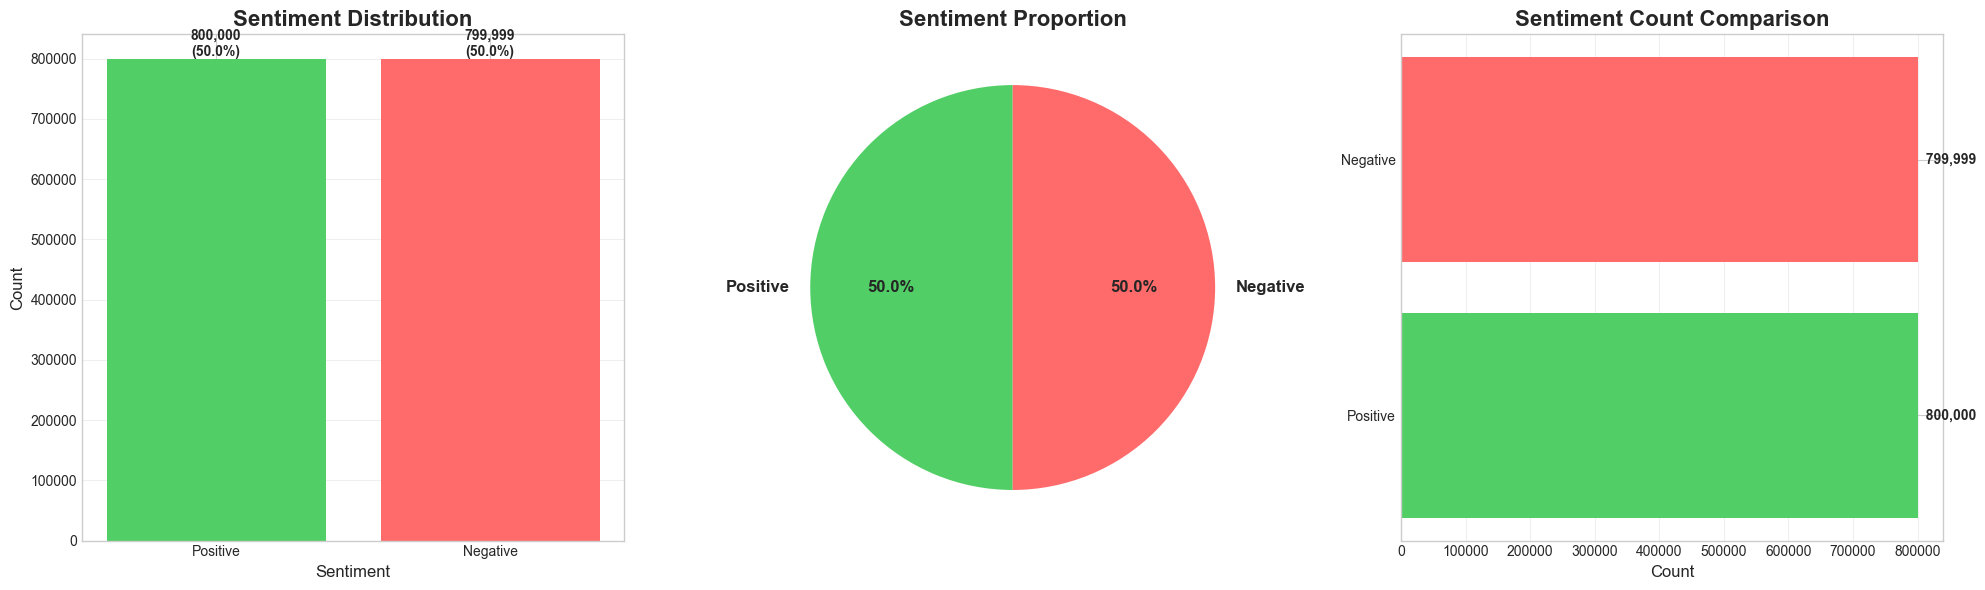

✅ Saved:  sentiment_distribution.png


In [40]:
print("\n📊 Creating sentiment distribution charts...")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Bar chart
sentiment_counts = data['sentiment'].value_counts()
bars = axes[0].bar(range(len(sentiment_counts)), sentiment_counts.values, 
                   color=[colors_sentiment. get(s, '#999') for s in sentiment_counts.index])
axes[0].set_xticks(range(len(sentiment_counts)))
axes[0].set_xticklabels(sentiment_counts.index, rotation=0)
axes[0].set_title('Sentiment Distribution', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, (sentiment, count) in enumerate(sentiment_counts.items()):
    axes[0].text(i, count, f'{count:,}\n({count/len(data)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold', fontsize=10)

# Pie chart
axes[1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
           colors=[colors_sentiment.get(s, '#999') for s in sentiment_counts.index],
           startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Sentiment Proportion', fontsize=16, fontweight='bold')

# Horizontal bar with percentages
y_pos = range(len(sentiment_counts))
axes[2].barh(y_pos, sentiment_counts.values,
            color=[colors_sentiment.get(s, '#999') for s in sentiment_counts.index])
axes[2].set_yticks(y_pos)
axes[2].set_yticklabels(sentiment_counts.index)
axes[2].set_xlabel('Count', fontsize=12)
axes[2].set_title('Sentiment Count Comparison', fontsize=16, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

for i, count in enumerate(sentiment_counts.values):
    axes[2].text(count, i, f'  {count:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved:  sentiment_distribution.png")


📏 Creating text length visualizations...


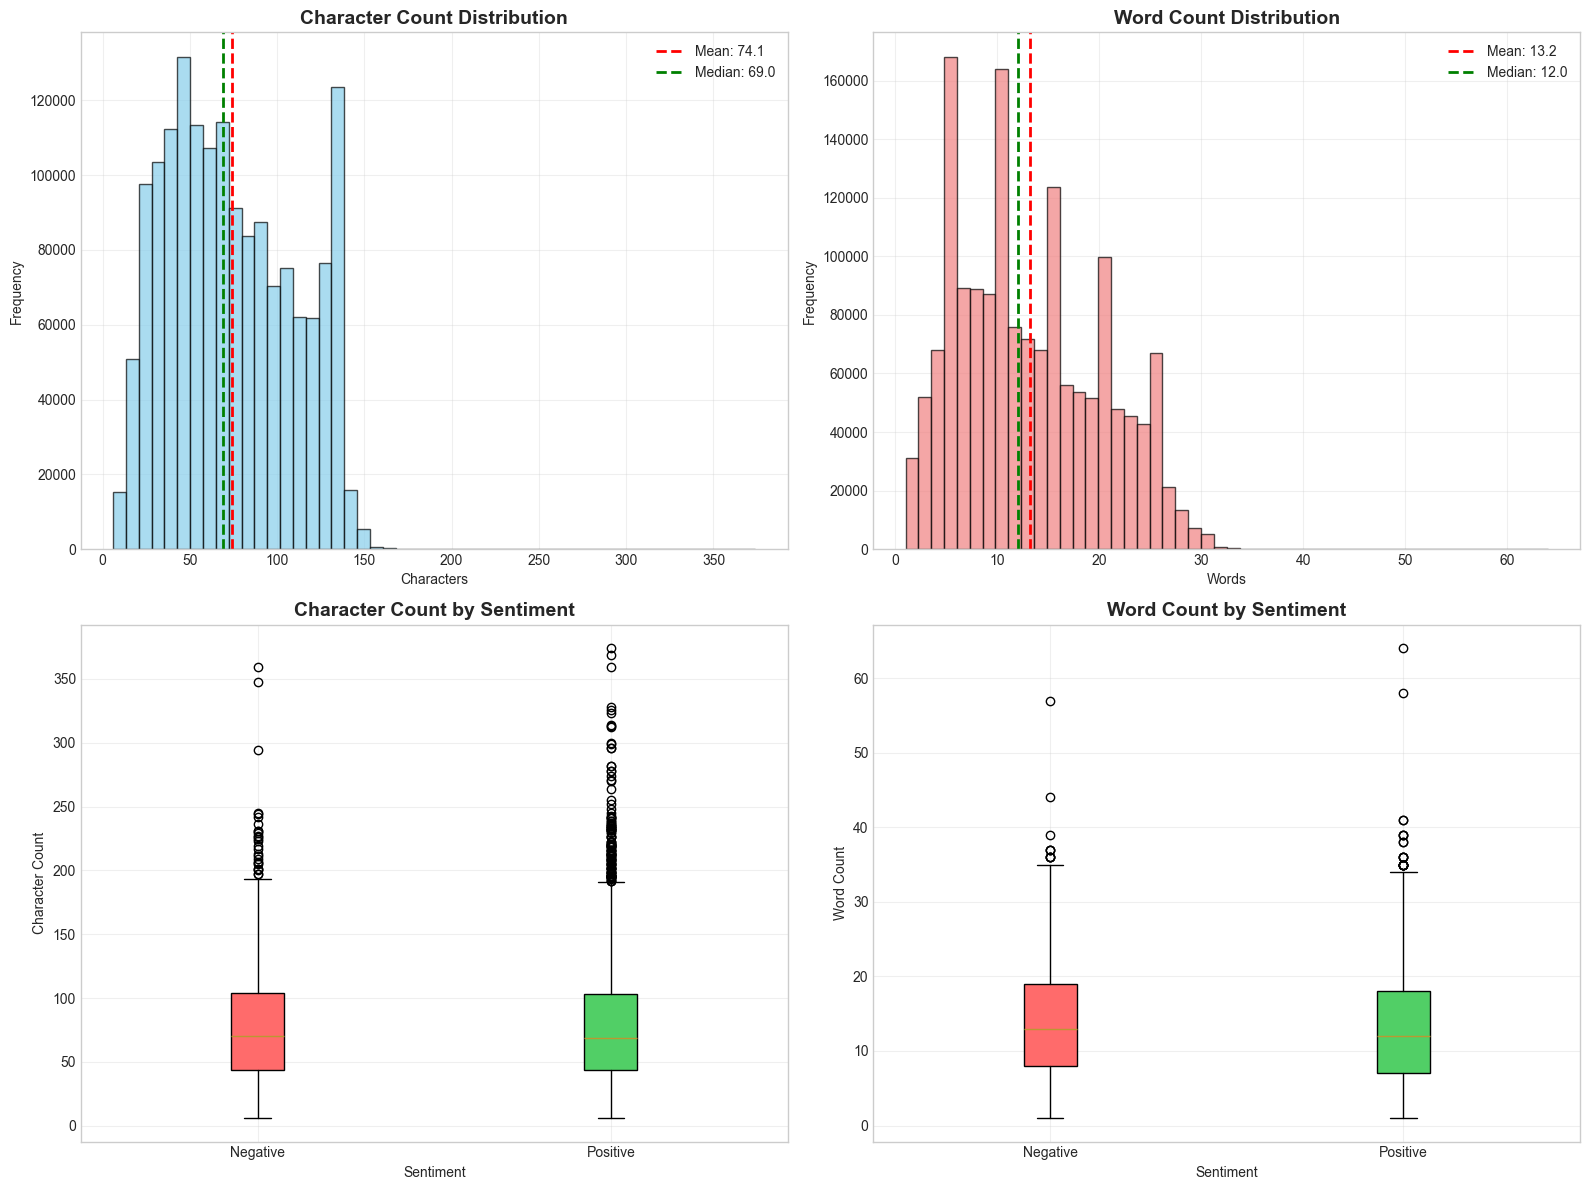

✅ Saved: text_length_analysis. png


In [43]:
#Text Length Analysis
print("\n📏 Creating text length visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Character count histogram
axes[0, 0]. hist(data['char_count'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(data['char_count'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {data["char_count"]. mean():.1f}')
axes[0, 0].axvline(data['char_count'].median(), color='green', linestyle='--', linewidth=2, 
                   label=f'Median: {data["char_count"].median():.1f}')
axes[0, 0].set_title('Character Count Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Characters')
axes[0, 0]. set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Word count histogram
axes[0, 1].hist(data['word_count'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(data['word_count'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {data["word_count"].mean():.1f}')
axes[0, 1].axvline(data['word_count'].median(), color='green', linestyle='--', linewidth=2, 
                   label=f'Median: {data["word_count"].median():.1f}')
axes[0, 1].set_title('Word Count Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Words')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plot - char count by sentiment
sentiment_order = ['Negative', 'Neutral', 'Positive']
existing_sentiments = [s for s in sentiment_order if s in data['sentiment'].values]

data_chars = [data[data['sentiment'] == s]['char_count'].values for s in existing_sentiments]
bp1 = axes[1, 0].boxplot(data_chars, labels=existing_sentiments, patch_artist=True)
for patch, sentiment in zip(bp1['boxes'], existing_sentiments):
    patch.set_facecolor(colors_sentiment.get(sentiment, '#999'))
axes[1, 0].set_title('Character Count by Sentiment', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Character Count')
axes[1, 0].grid(alpha=0.3)

# Box plot - word count by sentiment
data_words = [data[data['sentiment'] == s]['word_count'].values for s in existing_sentiments]
bp2 = axes[1, 1].boxplot(data_words, labels=existing_sentiments, patch_artist=True)
for patch, sentiment in zip(bp2['boxes'], existing_sentiments):
    patch.set_facecolor(colors_sentiment.get(sentiment, '#999'))
axes[1, 1].set_title('Word Count by Sentiment', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sentiment')
axes[1, 1].set_ylabel('Word Count')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: text_length_analysis. png")

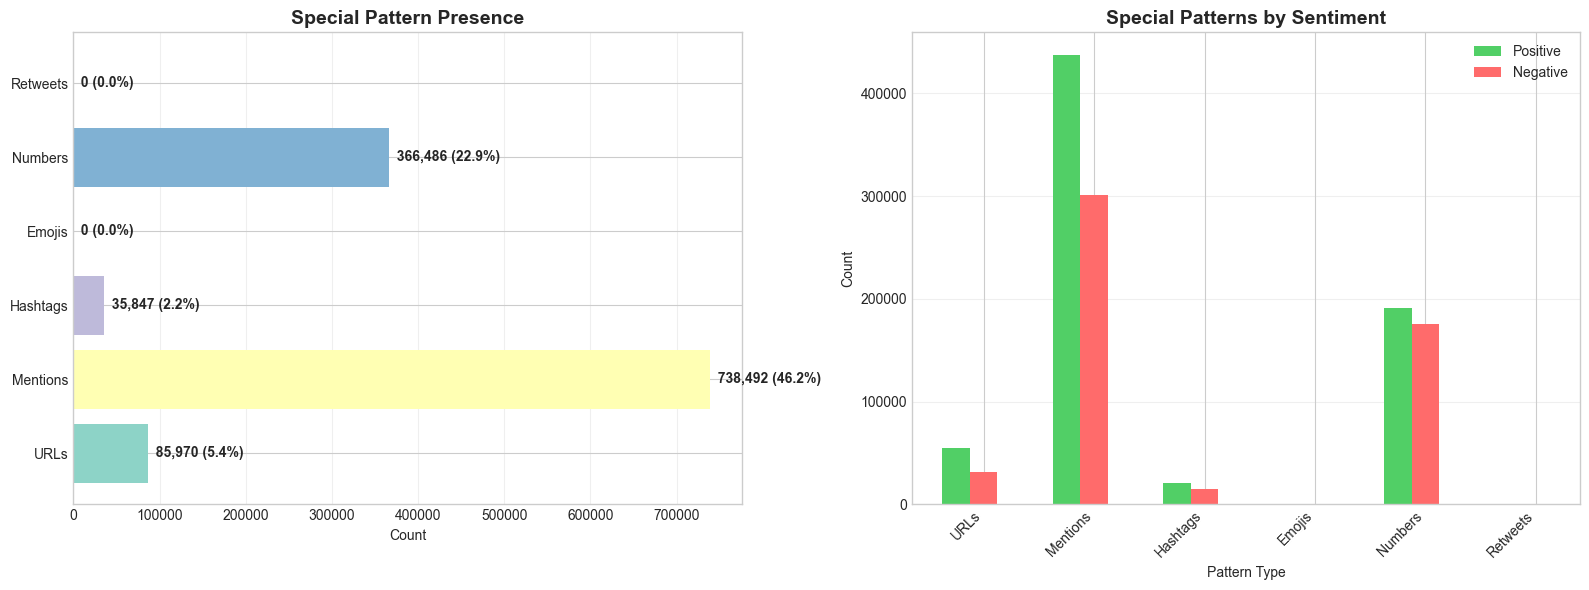

✅ Saved: special_patterns_analysis.png


In [46]:
# print("\n Creating special patterns visualization...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pattern presence
patterns = ['has_url', 'has_mention', 'has_hashtag', 'has_emoji', 'has_numbers', 'is_retweet']
pattern_labels = ['URLs', 'Mentions', 'Hashtags', 'Emojis', 'Numbers', 'Retweets']
pattern_counts = [data[col].sum() for col in patterns]
pattern_colors = plt.cm.Set3(range(len(patterns)))

axes[0].barh(pattern_labels, pattern_counts, color=pattern_colors)
axes[0].set_title('Special Pattern Presence', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count')
axes[0].grid(axis='x', alpha=0.3)

for i, count in enumerate(pattern_counts):
    pct = count / len(data) * 100
    axes[0].text(count, i, f'  {count:,} ({pct:.1f}%)', va='center', fontweight='bold')

# Patterns by sentiment
pattern_by_sentiment = data.groupby('sentiment')[patterns].sum()
x = np.arange(len(pattern_labels))
width = 0.25

for i, sentiment in enumerate(['Positive', 'Negative', 'Neutral']):
    if sentiment in pattern_by_sentiment. index:
        values = [pattern_by_sentiment.loc[sentiment, p] for p in patterns]
        offset = (i - 1) * width
        axes[1].bar(x + offset, values, width, label=sentiment,
                   color=colors_sentiment.get(sentiment, '#999'))

axes[1].set_title('Special Patterns by Sentiment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Pattern Type')
axes[1].set_ylabel('Count')
axes[1].set_xticks(x)
axes[1].set_xticklabels(pattern_labels, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('special_patterns_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: special_patterns_analysis.png")


📅 Creating temporal visualizations...


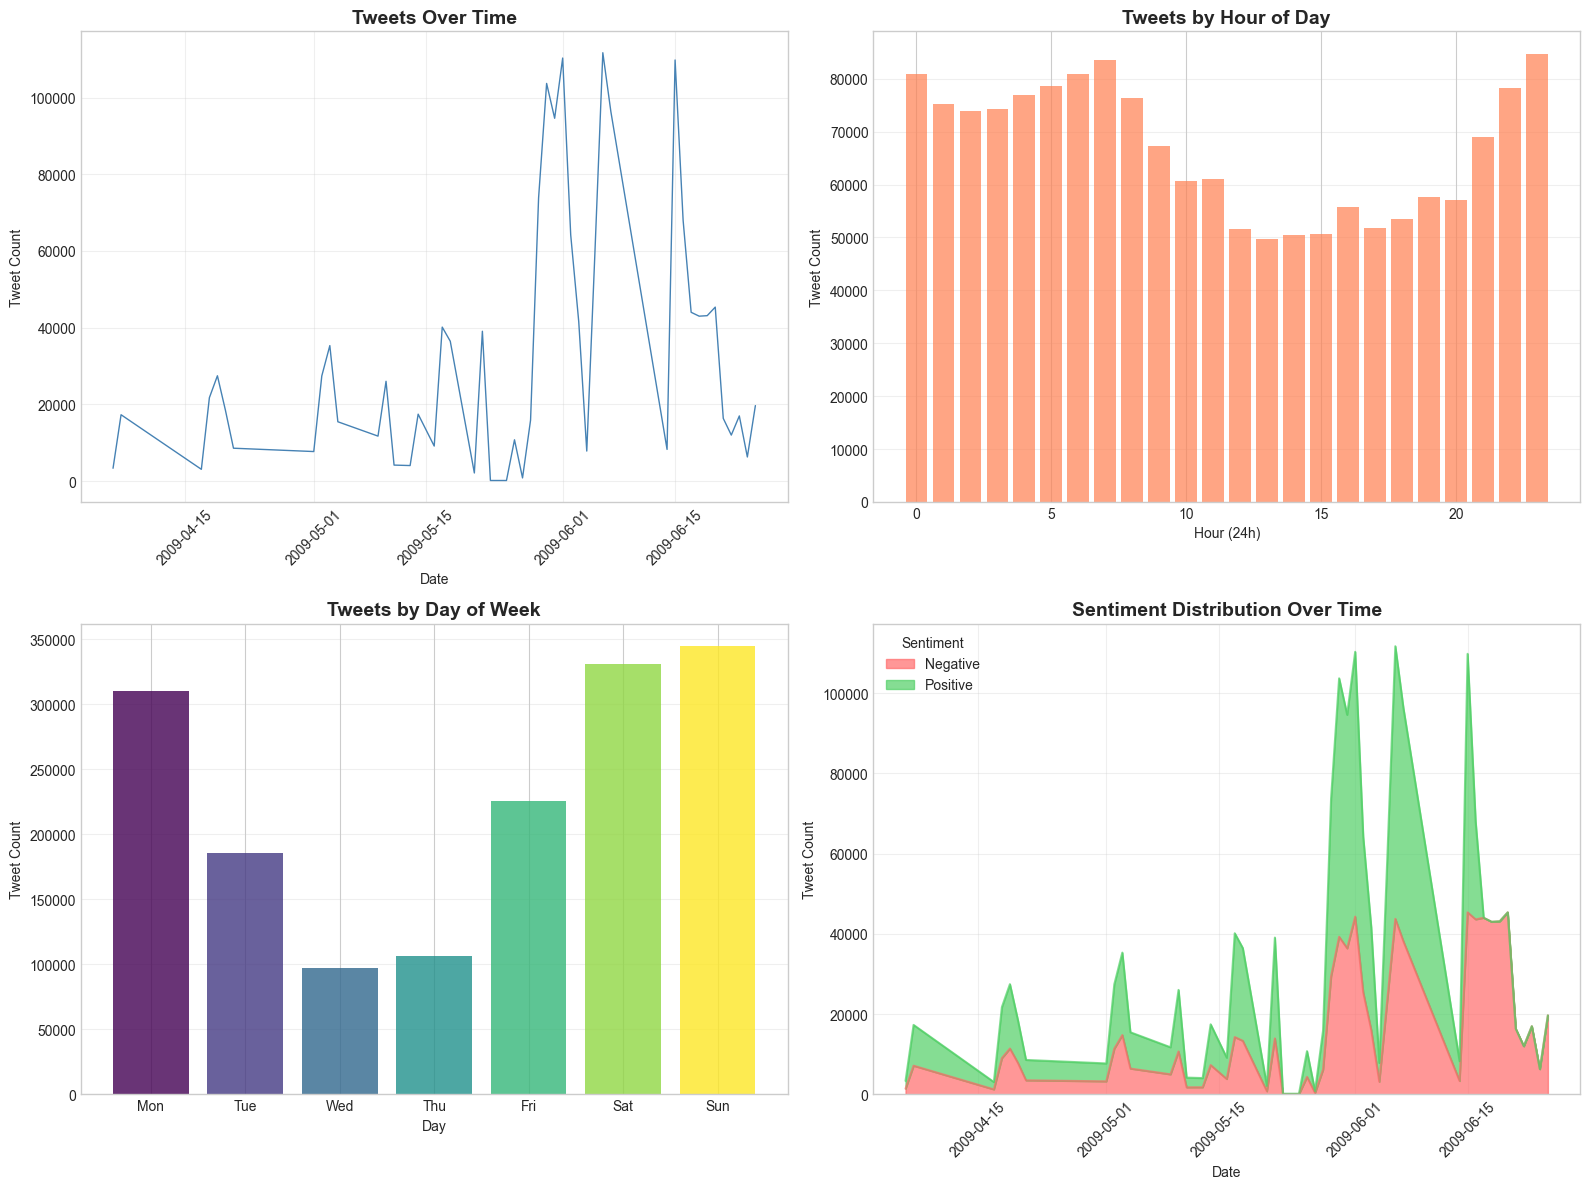

✅ Saved: temporal_analysis.png

✅ All visualizations created successfully!


In [47]:
# Temporal Analysis (if dates available)

if data['date_parsed'].notna().sum() > 0:
    print("\n📅 Creating temporal visualizations...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Tweets over time
    df_time = data[data['date_parsed'].notna()].copy()
    df_time['date_only'] = df_time['date_parsed'].dt.date
    daily_counts = df_time.groupby('date_only').size()
    
    axes[0, 0].plot(daily_counts.index, daily_counts.values, color='steelblue', linewidth=1)
    axes[0, 0].set_title('Tweets Over Time', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Tweet Count')
    axes[0, 0].grid(alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Tweets by hour
    if 'hour' in data.columns:
        hourly_counts = data.groupby('hour').size()
        axes[0, 1].bar(hourly_counts.index, hourly_counts.values, color='coral', alpha=0.7)
        axes[0, 1].set_title('Tweets by Hour of Day', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Hour (24h)')
        axes[0, 1].set_ylabel('Tweet Count')
        axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Tweets by day of week
    if 'day_of_week' in data.columns:
        days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_counts = data['day_of_week'].value_counts().reindex(days_order, fill_value=0)
        axes[1, 0].bar(range(len(day_counts)), day_counts.values, 
                      color=plt.cm.viridis(np.linspace(0, 1, 7)), alpha=0.8)
        axes[1, 0].set_xticks(range(len(days_order)))
        axes[1, 0].set_xticklabels([d[: 3] for d in days_order], rotation=0)
        axes[1, 0].set_title('Tweets by Day of Week', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Day')
        axes[1, 0].set_ylabel('Tweet Count')
        axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Sentiment over time (stacked area)
    sentiment_time = df_time.groupby(['date_only', 'sentiment']).size().unstack(fill_value=0)
    sentiment_time.plot(kind='area', stacked=True, ax=axes[1, 1], 
                       color=[colors_sentiment.get(s, '#999') for s in sentiment_time.columns],
                       alpha=0.7)
    axes[1, 1].set_title('Sentiment Distribution Over Time', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Tweet Count')
    axes[1, 1].legend(title='Sentiment')
    axes[1, 1].grid(alpha=0.3)
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('temporal_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: temporal_analysis.png")

print("\n✅ All visualizations created successfully!")

In [49]:


# KEY INSIGHTS & FINDINGS


insights = []

# 1. Dataset overview
insights.append(f" Dataset contains {len(data):,} tweets from {data['user']. nunique():,} unique users")

# 2. Sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
dominant_sentiment = sentiment_counts.idxmax()
insights.append(f"😊 Most common sentiment: '{dominant_sentiment}' ({sentiment_counts.max():,} tweets, {sentiment_counts.max()/len(data)*100:.1f}%)")

# 3. Class balance
if len(sentiment_counts) >= 2:
    balance_ratio = sentiment_counts.min() / sentiment_counts.max()
    if balance_ratio < 0.5:
        insights.append(f" Dataset is imbalanced (ratio: {balance_ratio:.3f}) - consider balancing techniques")
    elif balance_ratio < 0.8:
        insights.append(f" Dataset is moderately balanced (ratio: {balance_ratio:.3f})")
    else:
        insights.append(f" Dataset is well balanced (ratio: {balance_ratio:.3f})")
# 4. Text characteristics
avg_chars = data['char_count'].mean()
avg_words = data['word_count'].mean()
insights.append(f" Average tweet length: {avg_chars:.1f} characters, {avg_words:.1f} words")

# 5. Special patterns
url_pct = data['has_url'].sum() / len(data) * 100
mention_pct = data['has_mention'].sum() / len(data) * 100
hashtag_pct = data['has_hashtag'].sum() / len(data) * 100
retweet_pct = data['is_retweet'].sum() / len(data) * 100

if url_pct > 10:
    insights.append(f" {url_pct:.1f}% of tweets contain URLs - preprocessing essential")
if mention_pct > 20:
    insights.append(f" {mention_pct:.1f}% of tweets contain mentions - social interaction is high")
if hashtag_pct > 15:
    insights.append(f"# {hashtag_pct:.1f}% of tweets contain hashtags")
if retweet_pct > 5:
    insights.append(f" {retweet_pct:.1f}% are retweets - consider filtering for original content")

# 6. Data quality
duplicate_pct = data.duplicated(subset='text').sum() / len(data) * 100
if duplicate_pct < 1:
    insights.append(f" Excellent data quality:  {duplicate_pct:.2f}% duplicates")
elif duplicate_pct < 5:
    insights.append(f" Good data quality: {duplicate_pct:.2f}% duplicates")
else:
    insights.append(f" {duplicate_pct:.2f}% duplicate tweets detected")

# 7. Punctuation patterns
high_exclaim_sentiment = data.groupby('sentiment')['exclamation_count'].mean().idxmax()
insights.append(f" '{high_exclaim_sentiment}' tweets use most exclamation marks (avg {data[data['sentiment']==high_exclaim_sentiment]['exclamation_count'].mean():.2f})")

# 8. User activity
most_active_user = data['user'].value_counts().idxmax()
most_active_count = data['user'].value_counts().max()
insights.append(f"👤 Most active user: @{most_active_user} with {most_active_count:,} tweets")

# 9. Temporal patterns
if data['date_parsed'].notna().sum() > 0:
    date_range = (data['date_parsed'].max() - data['date_parsed'].min()).days
    insights.append(f" Data spans {date_range} days ({data['date_parsed'].min().strftime('%Y-%m-%d')} to {data['date_parsed'].max().strftime('%Y-%m-%d')})")

# 10. Length differences
longest_sentiment = data.groupby('sentiment')['char_count'].mean().idxmax()
shortest_sentiment = data.groupby('sentiment')['char_count'].mean().idxmin()
insights.append(f" '{longest_sentiment}' tweets are longest (avg {data[data['sentiment']==longest_sentiment]['char_count'].mean():.0f} chars)")
insights.append(f" '{shortest_sentiment}' tweets are shortest (avg {data[data['sentiment']==shortest_sentiment]['char_count'].mean():.0f} chars)")

# Print insights
print("\n🔍 KEY FINDINGS:\n")
for i, insight in enumerate(insights, 1):
    print(f"{i: 2}. {insight}\n")

# Create summary table
summary_data = {
    'Metric': [
        'Total Tweets',
        'Unique Users',
        'Dominant Sentiment',
        'Avg Characters',
        'Avg Words',
        'Contains URLs (%)',
        'Contains Mentions (%)',
        'Contains Hashtags (%)',
        'Retweets (%)',
        'Duplicate Tweets (%)',
        'Date Range (days)'
    ],
    'Value':  [
        f"{len(data):,}",
        f"{data['user']. nunique():,}",
        dominant_sentiment,
        f"{avg_chars:.1f}",
        f"{avg_words:.1f}",
        f"{url_pct:.2f}%",
        f"{mention_pct:.2f}%",
        f"{hashtag_pct:.2f}%",
        f"{retweet_pct:.2f}%",
        f"{duplicate_pct:.2f}%",
        f"{(data['date_parsed'].max() - data['date_parsed'].min()).days if data['date_parsed'].notna().sum() > 0 else 'N/A'}"
    ]
}

summary_df = pd.DataFrame(summary_data)

print("\n📋 SUMMARY TABLE:")
display(summary_df)


🔍 KEY FINDINGS:

 1.  Dataset contains 1,599,999 tweets from 659,775 unique users

 2. 😊 Most common sentiment: 'Positive' (800,000 tweets, 50.0%)

 3.  Dataset is well balanced (ratio: 1.000)

 4.  Average tweet length: 74.1 characters, 13.2 words

 5.  46.2% of tweets contain mentions - social interaction is high

 6.  Good data quality: 1.16% duplicates

 7.  'Positive' tweets use most exclamation marks (avg 0.67)

 8. 👤 Most active user: @lost_dog with 549 tweets

 9.  Data spans 79 days (2009-04-06 to 2009-06-25)

 10.  'Negative' tweets are longest (avg 74 chars)

 11.  'Positive' tweets are shortest (avg 74 chars)


📋 SUMMARY TABLE:


,Metric,Value
0,Total Tweets,"1,599,999"
1,Unique Users,"659,775"
2,Dominant Sentiment,Positive
3,Avg Characters,74.1
4,Avg Words,13.2
5,Contains URLs (%),5.37%
6,Contains Mentions (%),46.16%
7,Contains Hashtags (%),2.24%
8,Retweets (%),0.00%
9,Duplicate Tweets (%),1.16%


In [50]:
data.to_csv('data_explored.csv', index=False)
print(f"✅ Saved:  data_explored.csv ({len(data):,} rows, {len(data.columns)} columns)")


✅ Saved:  data_explored.csv (1,599,999 rows, 24 columns)


In [51]:
 #Save summary statistics
 # Calculate key metrics for report
sentiment_dist = data['sentiment'].value_counts()
balance_ratio = sentiment_dist.min() / sentiment_dist.max() if len(sentiment_dist) >= 2 else 1
quality_score = 100 - (data.duplicated(subset='text').sum() / len(data) * 10)

summary_stats = {
    'total_tweets': len(data),
    'unique_users': data['user'].nunique(),
    'sentiment_distribution': sentiment_dist.to_dict(),
    'avg_char_count': data['char_count'].mean(),
    'avg_word_count': data['word_count'].mean(),
    'url_percentage': data['has_url'].sum() / len(data) * 100,
    'mention_percentage': data['has_mention'].sum() / len(data) * 100,
    'hashtag_percentage':  data['has_hashtag'].sum() / len(data) * 100,
    'duplicate_percentage': data.duplicated(subset='text').sum() / len(data) * 100,
    'quality_score': quality_score,
    'balance_ratio': balance_ratio
}

import json
with open('exploration_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)
print("✅ Saved: exploration_summary.json")

✅ Saved: exploration_summary.json
